the fitting Scale Parameter and Weibull Shape are
n = 0.7375033754361724    a = 1.4700361937883202


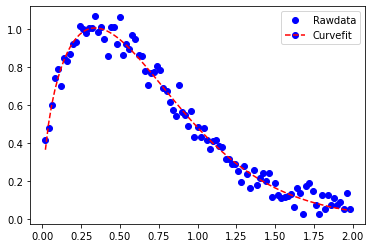

In [1]:
#Weibull Plot with randomized noise and curvefit plot

import matplotlib.pyplot as plt
import numpy as np

#from scipy import optimize
from scipy.optimize import curve_fit

#Define the Weibull probability density, https://en.wikipedia.org/wiki/Weibull_distribution
def weib(x,n,a):
    return (a / n) * (x / n)**(a - 1) * np.exp(-(x / n)**a)

x_data = np.arange(1,100.)/50.

# Scale Parameter 
#if n<1, likley, design issue, 'infant motality', high failure initially testing
#if n>1, likely aging effect, failure increasing over time
n = 0.75

#Weibull Shape
a = 1.5

#Define the randomized noise with the same size as the Weibull data
np.random.seed(0)
RandomNoise = np.random.normal(loc=0.0, scale=0.05, size=np.size(x_data))


#Weibull Distribution with Randomized Noise
y_data = weib(x_data, n, a) + RandomNoise

#Curve fitting, where popt contains the parameters of curve fitting
popt, pcov = curve_fit(weib, x_data, y_data)

#Set the plot figure size
plt.figure(figsize = (6,4))

#plot the data
Rawdata, = plt.plot(x_data, y_data, 'bo')

#plot the curve fitting
Curvefit, = plt.plot(x_data, weib(x_data, *popt), 'r--')
plt.legend([Rawdata, (Rawdata, Curvefit)],["Rawdata","Curvefit"])
print('the fitting Scale Parameter and Weibull Shape are')
print('n =', popt.item(0), '   a =', popt.item(1))
